In [23]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [3]:
data = pd.read_excel("Downloads/doppler.xlsx")

In [4]:
data

,group,sex,Age,RCCRI,RCCPS,RCCED,RICRI,RICPS,RICED,LCCRI,...,LCCED,LICRI,LICPS,LICED,RVRI,RVPS,RVED,LVRI,LVPS,LVED
0,1.0,1.0,31.0,0.760000,75.0,18.0,0.725490,102.0,28.0,0.826667,...,13.0,0.794118,102.0,21.0,0.696970,66.0,20.0,0.571429,42.0,18.0
1,1.0,0.0,27.0,0.750000,76.0,19.0,0.589744,78.0,32.0,0.750000,...,18.0,0.855422,83.0,12.0,0.762712,59.0,14.0,0.777778,45.0,10.0
2,1.0,0.0,27.0,0.707692,65.0,19.0,0.714286,77.0,22.0,0.795455,...,18.0,0.774194,93.0,21.0,0.742857,70.0,18.0,0.793103,29.0,6.0
3,1.0,1.0,31.0,0.766667,90.0,21.0,0.791209,91.0,19.0,0.764706,...,20.0,0.743590,78.0,20.0,0.787879,33.0,7.0,0.693878,49.0,15.0
4,1.0,0.0,36.0,0.685714,35.0,11.0,0.833333,36.0,6.0,0.743590,...,10.0,0.738095,42.0,11.0,0.738095,42.0,11.0,0.855263,76.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2.0,1.0,19.0,0.730769,52.0,14.0,0.651163,86.0,30.0,0.684932,...,23.0,0.695652,69.0,21.0,0.612245,49.0,19.0,0.677419,62.0,20.0
72,2.0,1.0,22.0,0.733333,60.0,16.0,0.600000,80.0,32.0,0.676923,...,21.0,0.712500,80.0,23.0,0.717949,39.0,11.0,0.644068,59.0,21.0
73,2.0,0.0,23.0,0.735849,53.0,14.0,0.585366,82.0,34.0,0.739726,...,19.0,0.745455,55.0,14.0,0.689655,58.0,18.0,0.666667,66.0,22.0
74,2.0,0.0,24.0,0.765957,47.0,11.0,0.758065,62.0,15.0,0.717949,...,11.0,0.772727,44.0,10.0,0.658537,41.0,14.0,0.652778,72.0,25.0


In [5]:
def results(CM):
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP / (TP + FN)
    # Specificity or true negative rate
    TNR = TN / (TN + FP)
    # Precision or positive predictive value
    PPV = TP / (TP + FP)
    # Negative predictive value
    NPV = TN / (TN + FN)
    return ('sensetivity: ', TPR, ' specifity: ', TNR, ' PPV: ', PPV, ' NPV: ', NPV)

In [71]:
y = data['group']
x = data.drop('group',axis=1)
x = x[selected_features]

In [ ]:
features = x.columns
pipeline = Pipeline([
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,1,0.02)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(x,y)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = (coefficients)
feature_selection = pd.Series(data = importance , index = np.array(features)).sort_values()
plt.barh(np.arange(len(feature_selection.index)),feature_selection.values , tick_label =feature_selection.index )
plt.savefig('Downloads/feature_selection_Doppler.png', dpi=600)
feature_selection = feature_selection*10

selected_features = [feature_selection.index]

In [98]:
lasso_x_train, lasso_x_test, lasso_y_train, lasso_y_test = train_test_split(x, y, test_size=0.5,
                                                                            random_state=11)

In [99]:
standard = StandardScaler()
lasso_x_train = standard.fit_transform(lasso_x_train)
lasso_x_test = standard.fit_transform(lasso_x_test)

In [100]:
lasso_y_train = lasso_y_train-1
lasso_y_test = lasso_y_test-1

In [101]:
lasso_lr = LogisticRegression(penalty='l2', tol=1e-5)
lasso_lr.fit(lasso_x_train, lasso_y_train)
lasso_lr_pred_prob = lasso_lr.predict_proba(lasso_x_test)
lasso_lr_pred = lasso_lr.predict(lasso_x_test)

In [102]:
print("LR evaluation results for lasso: ",results(metrics.confusion_matrix(lasso_y_test, lasso_lr_pred)))

LR evaluation results for lasso:  ('sensetivity: ', 0.9047619047619048, ' specifity: ', 0.8823529411764706, ' PPV: ', 0.9047619047619048, ' NPV: ', 0.8823529411764706)


In [103]:
lasso_lr_pred_prob = 1 - lasso_lr_pred_prob.reshape(76, 1)[::2]

In [104]:
lasso_rf = RandomForestClassifier(oob_score=True, criterion='gini', max_depth=13)
lasso_rf.fit(lasso_x_train, lasso_y_train)
lasso_rf_pred_prob = lasso_rf.predict_proba(lasso_x_test)
lasso_rf_pred = lasso_rf.predict(lasso_x_test)
lasso_rf_pred_prob = 1 - lasso_rf_pred_prob.reshape(76, 1)[::2]
print("RF evaluation results for lasso:",results(metrics.confusion_matrix(lasso_y_test, lasso_rf_pred)))

RF evaluation results for lasso: ('sensetivity: ', 0.6666666666666666, ' specifity: ', 1.0, ' PPV: ', 1.0, ' NPV: ', 0.7083333333333334)


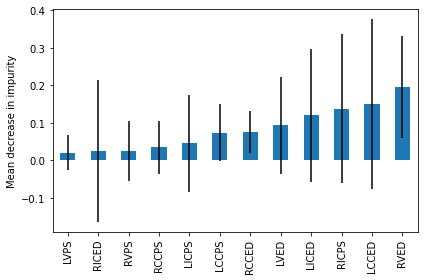

In [113]:
importances = lasso_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in lasso_rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x.columns)
forest_importances = forest_importances.sort_values()
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('Downloads/feature_importance.png')

In [106]:
lasso_knn = KNeighborsClassifier(n_neighbors=3, leaf_size=30, weights='distance')
lasso_knn.fit(lasso_x_train, lasso_y_train)
lasso_knn_pred_prob = lasso_knn.predict_proba(lasso_x_test)
lasso_knn_pred = lasso_knn.predict(lasso_x_test)
lasso_knn_pred_prob = 1 - lasso_knn_pred_prob.reshape(76 , 1)[::2]
print("KNN evaluation results for lasso: ",results(metrics.confusion_matrix(lasso_y_test, lasso_knn_pred)))

KNN evaluation results for lasso:  ('sensetivity: ', 0.7619047619047619, ' specifity: ', 0.8823529411764706, ' PPV: ', 0.8888888888888888, ' NPV: ', 0.75)


In [111]:
lasso_svm = SVC(decision_function_shape='ovo')
lasso_svm.probability = True
lasso_svm.fit(lasso_x_train, lasso_y_train)
pred_prob_lasso_svm = lasso_svm.predict_proba(lasso_x_test)
pred_lasso_svm = lasso_svm.predict(lasso_x_test)
np.set_printoptions()
print("SVM evaluation results for lasso: ",results(metrics.confusion_matrix(lasso_y_test, pred_lasso_svm)))
pred_prob_lasso_svm = 1 - pred_prob_lasso_svm.reshape(76, 1)[::2]

SVM evaluation results for lasso:  ('sensetivity: ', 0.7142857142857143, ' specifity: ', 1.0, ' PPV: ', 1.0, ' NPV: ', 0.7391304347826086)


LASSO SVM AUC:  0.9691876750700279
LASSO RF AUC:  0.9565826330532212
LASSO KNN AUC:  0.9201680672268908
LASSO LR AUC:  0.9523809523809523


C:\Users\siava\AppData\Local\Temp/ipykernel_11980/2929072735.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Downloads/doppler_auc_roc.png', dpi=600,
C:\Users\siava\AppData\Local\Temp/ipykernel_11980/2929072735.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Downloads/doppler_auc_roc.png', dpi=600,


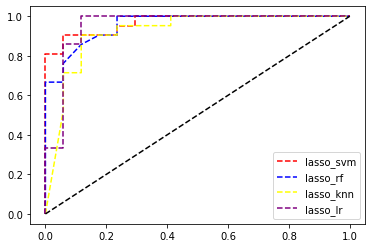

In [116]:
fpr2, tpr2, thresh2 = roc_curve(lasso_y_test, pred_prob_lasso_svm, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(lasso_y_test, lasso_rf_pred_prob, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(lasso_y_test, lasso_knn_pred_prob, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(lasso_y_test, lasso_lr_pred_prob, pos_label=1)
auc_score2 = roc_auc_score(lasso_y_test, pred_prob_lasso_svm)
auc_score3 = roc_auc_score(lasso_y_test, lasso_rf_pred_prob)
auc_score5 = roc_auc_score(lasso_y_test, lasso_knn_pred_prob)
auc_score6 = roc_auc_score(lasso_y_test, lasso_lr_pred_prob)
print("LASSO SVM AUC: ",auc_score2)
print("LASSO RF AUC: ",auc_score3)
print("LASSO KNN AUC: ",auc_score5)
print("LASSO LR AUC: ",auc_score6)
random_probs = [0 for i in range(len(lasso_y_test))]
p_fpr, p_tpr, _ = roc_curve(lasso_y_test, random_probs, pos_label=1)
plt.plot(fpr2, tpr2, linestyle='--', color='red', label='lasso_svm')
plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='lasso_rf')
plt.plot(fpr5, tpr5, linestyle='--', color='yellow', label='lasso_knn')
plt.plot(fpr6, tpr6, linestyle='--', color='purple', label='lasso_lr')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.legend(loc="lower right")
plt.savefig('Downloads/doppler_auc_roc.png', dpi=600,
            facecolor='w',
            edgecolor='w',
            orientation='portrait',
            papertype=None,
            format=None,
            transparent=False,
            bbox_inches=None,
            pad_inches=0.1,
            frameon=None,
            metadata=None)